In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [34]:
df= pd.read_csv('Flight_Booking.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [35]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.shape

(300153, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Data Visualization

<Axes: xlabel='airline', ylabel='price'>

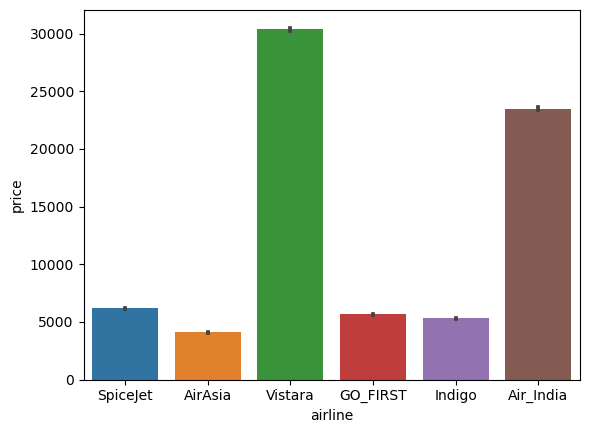

In [10]:
sns.barplot(x= df['airline'], y= df['price'])

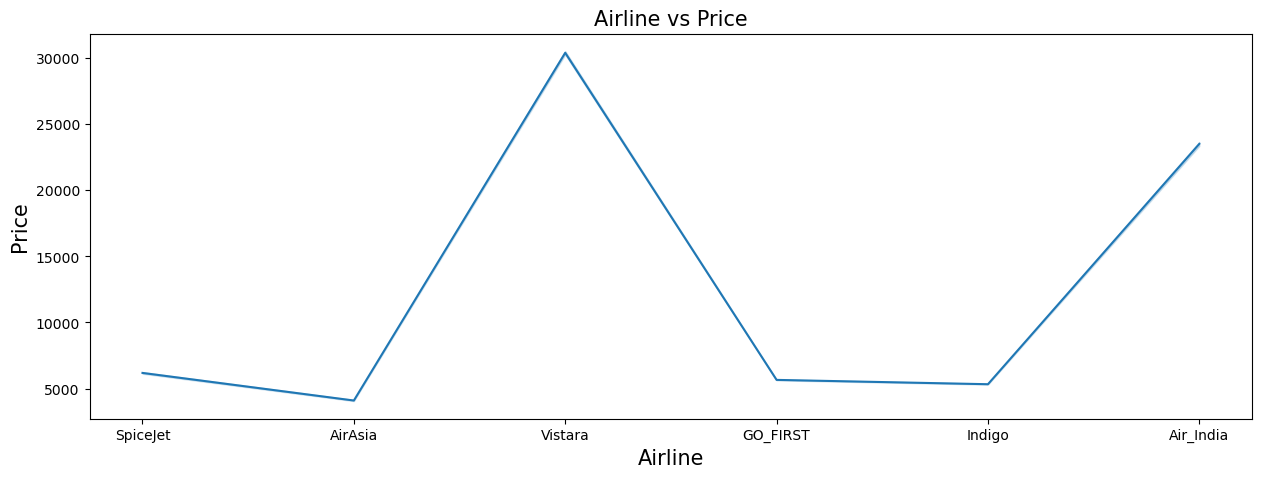

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(x= df['airline'], y= df['price'])
plt.title('Airline vs Price', fontsize= 15)
plt.xlabel('Airline', fontsize= 15)
plt.ylabel('Price', fontsize= 15)
plt.show()

In [ ]:
# If we see above plot we can see big difference in price of different airlines

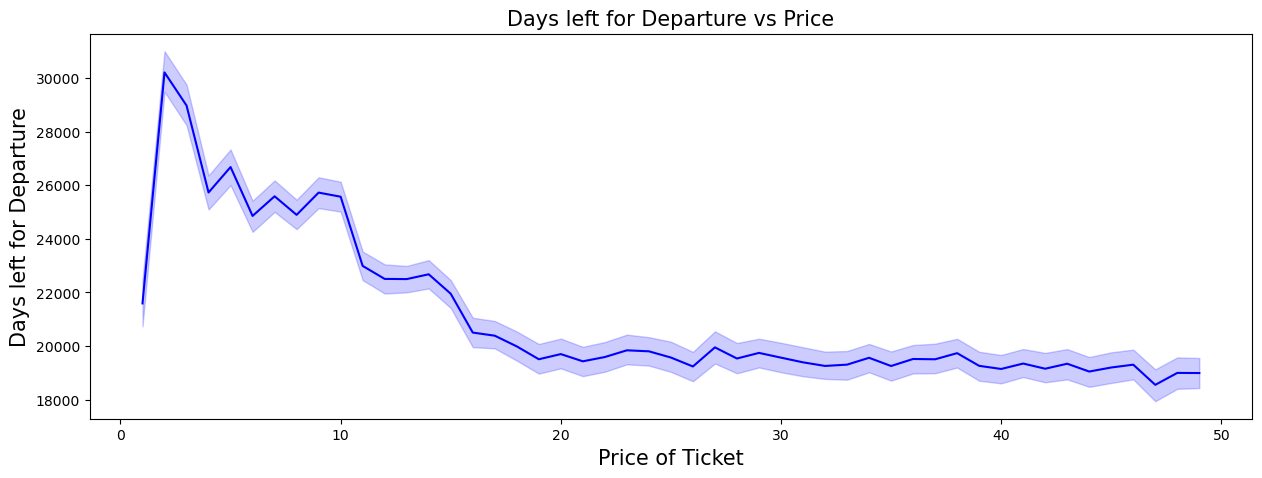

In [12]:
plt.figure(figsize= (15,5))
sns.lineplot(x= df['days_left'], y= df['price'], color= 'blue')
plt.title('Days left for Departure vs Price', fontsize= 15)
plt.xlabel('Price of Ticket', fontsize= 15)
plt.ylabel('Days left for Departure', fontsize= 15)
plt.show()

In [ ]:
# As we can see in the above plot as days left for departure are decreasing the prices of tickets are increasing

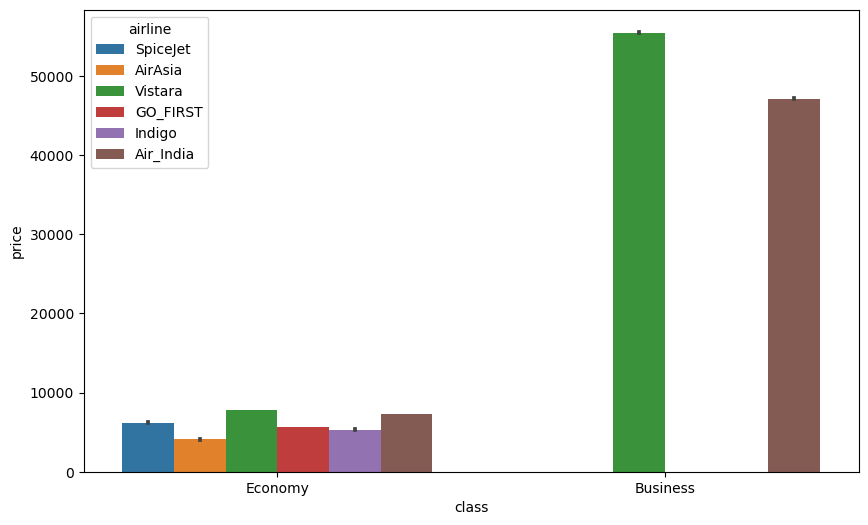

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['class'], y= df['price'], hue= df['airline'])
plt.show()

In [ ]:
# Business class are only provided by Vastara airline and AirIndia airline. Business class prices are higher than economy 

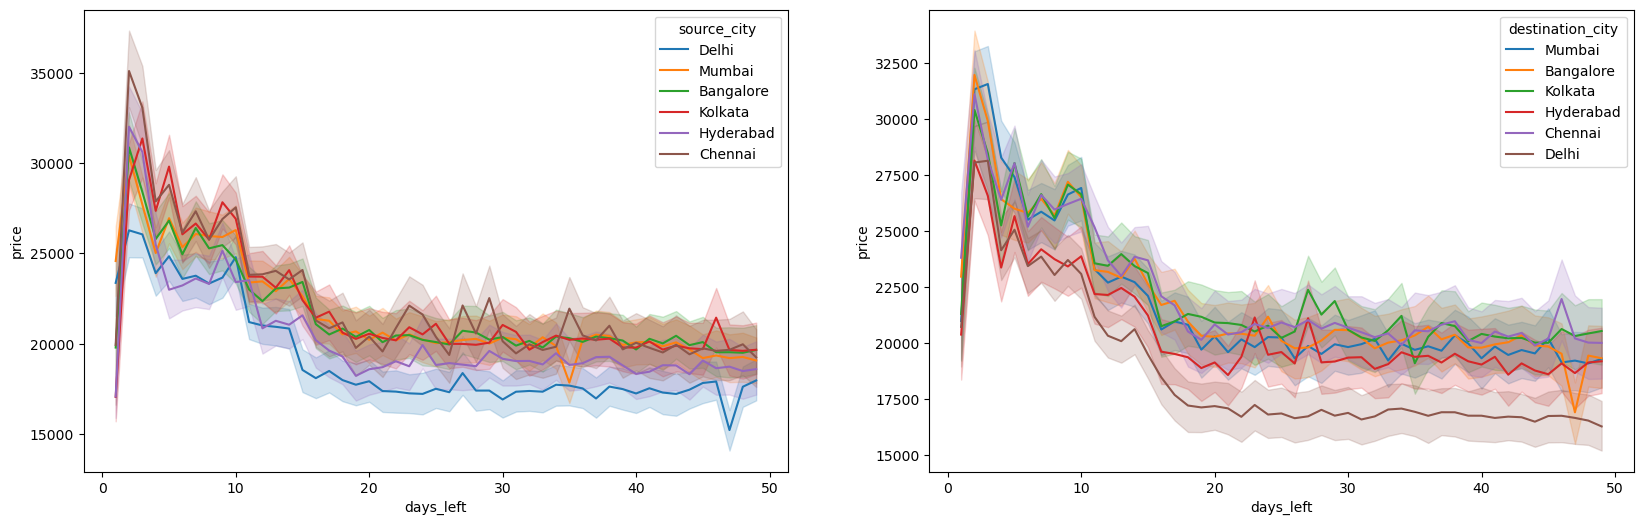

In [17]:
fig,ax= plt.subplots(1,2, figsize=(20,6))
sns.lineplot(x= 'days_left', y= 'price', data= df, hue= 'source_city', ax=ax[0])
sns.lineplot(x= 'days_left', y= 'price', data= df, hue= 'destination_city', ax= ax[1])
plt.show()

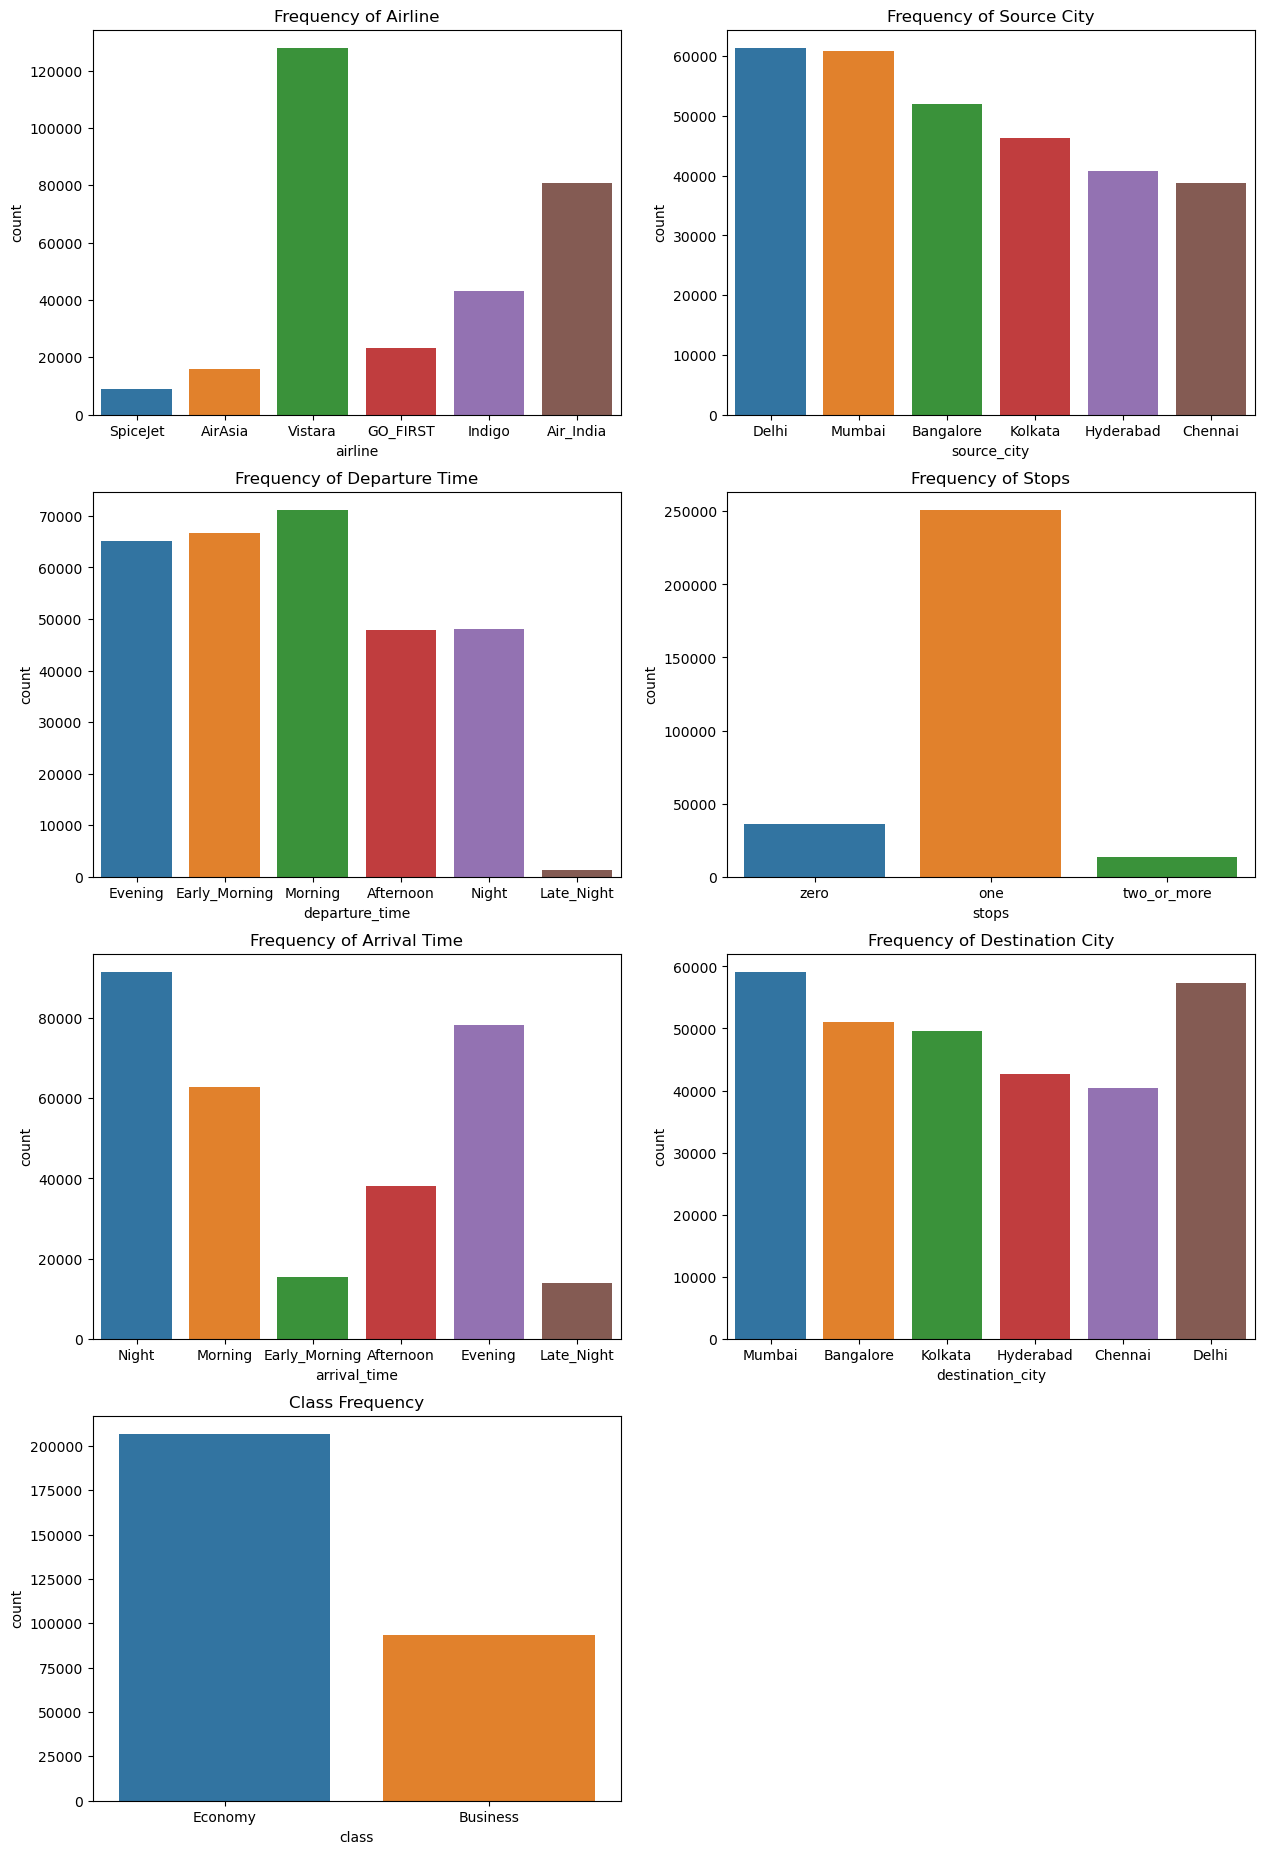

In [18]:
plt.figure(figsize= (15, 23))

plt.subplot(4,2,1)
sns.countplot(x= df['airline'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x= df['source_city'])
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x= df['departure_time'])
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x= df['stops'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x= df['arrival_time'])
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x= df['destination_city'])
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x= df['class'])
plt.title('Class Frequency')

plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [36]:
for i in df.columns:
    if (df[i].dtype== 'object') & (i!= 'flight'):
        df[i]= le.fit_transform(df[i])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


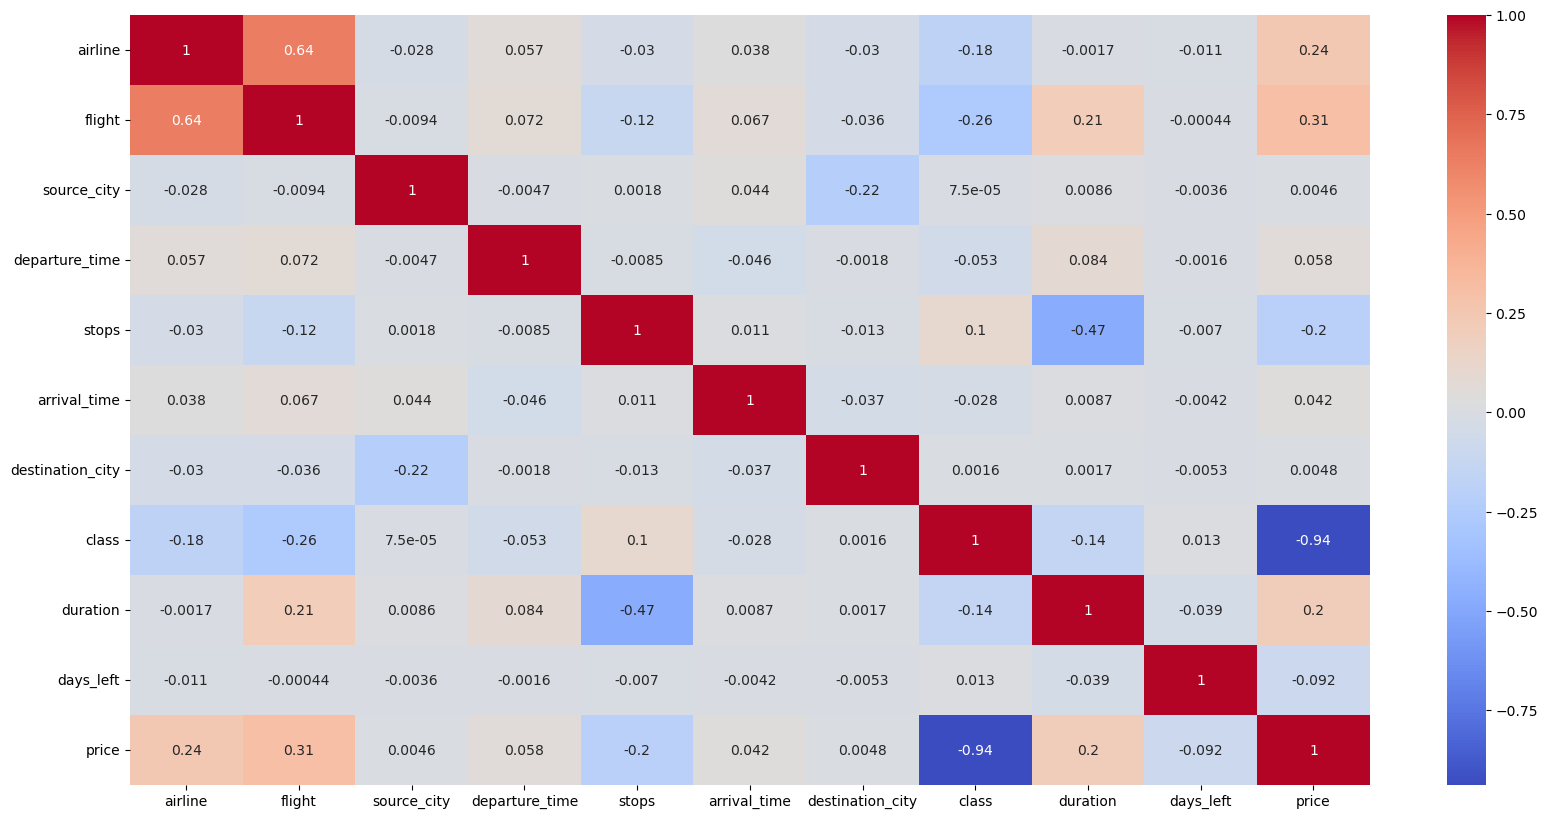

In [25]:
plt.figure(figsize= (20,10))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')
plt.show()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col= []
for i in df.columns:
    if (df[i].dtype!= 'object') & (i!= 'price'):
        col.append(i)
        
x= df[col]
vif= pd.DataFrame()
vif['Features']= x.columns
vif['VIF']= [variance_inflation_factor(x.values, j) for j in range(len(x.columns))]
vif

,Features,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [42]:
fea= list(vif.Features)
fea

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [44]:
df_new= df[fea]
df_new

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [76]:
x= df_new
y= df.iloc[:, -1]

In [48]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 9)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
diff= pd.DataFrame(np.c_[y_test, y_pred], columns= ['Actual Value', 'Predicted Value'])
diff

,Actual Value,Predicted Value
0,4550.0,3790.265226
1,31896.0,50091.728208
2,8949.0,8007.362106
3,65529.0,52697.448584
4,74956.0,53885.028119
...,...,...
60026,4541.0,5482.917955
60027,3501.0,5062.668470
60028,4339.0,8250.072574
60029,6319.0,4144.918683


In [78]:
from sklearn.metrics import r2_score
print('r2_score :', r2_score(y_test, y_pred))

from sklearn.metrics import mean_absolute_error
print('mean_absolute_error :', mean_absolute_error(y_test,y_pred))

from sklearn.metrics import mean_absolute_percentage_error
print('mean_absolute_percentage_error :', mean_absolute_percentage_error(y_test, y_pred))

from sklearn.metrics import mean_squared_error
print('mean_squared_error :', mean_squared_error(y_test, y_pred))
print('root mean_squared_error :', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score : 0.9036625399873526
mean_absolute_error : 4670.5360362091715
mean_absolute_percentage_error : 0.43820170020004506
mean_squared_error : 50028874.84048023
root mean_squared_error : 7073.10927672408


C:\Users\Jay Parmar\AppData\Local\Temp\ipykernel_9560\1625436088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label= 'Actual')
C:\Users\Jay Parmar\AppData\Local\Temp\ipykernel_9560\1625436088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label= 'Predicted')


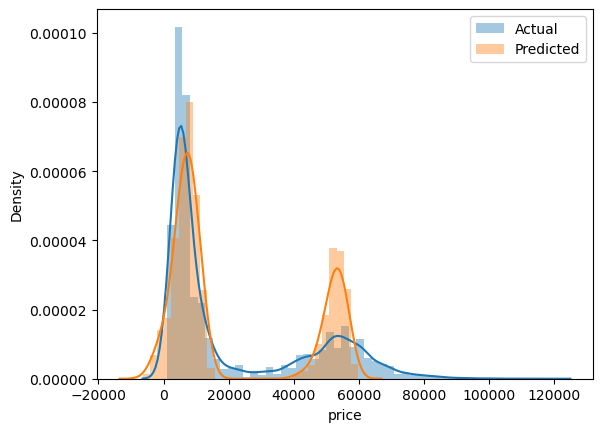

In [79]:
sns.distplot(y_test, label= 'Actual')
sns.distplot(y_pred, label= 'Predicted')
plt.legend()
plt.show()

In [80]:
#from sklearn.tree import DecisionTreeRegressor
#dt= DecisionTreeRegressor()
#x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 9)

#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()

#x_train= sc.fit_transform(x_train)
#x_test= sc.transform(x_test)
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [81]:
y_pred= dt.predict(x_test)
print('r2_score :', r2_score(y_test, y_pred))

print('mean_absolute_error :', mean_absolute_error(y_test,y_pred))

print('mean_absolute_percentage_error :', mean_absolute_percentage_error(y_test, y_pred))

print('mean_squared_error :', mean_squared_error(y_test, y_pred))

print('root mean_squared_error :', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score : 0.9768866312637721
mean_absolute_error : 1166.8237577251753
mean_absolute_percentage_error : 0.07602310694357792
mean_squared_error : 12002971.964330465
root mean_squared_error : 3464.5305546827644


In [82]:
#from sklearn.ensemble import RandomForestRegressor
#rf= RandomForestRegressor()
#x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 9)

#from sklearn.preprocessing import StandardScaler
#sc= StandardScaler()

#x_train= sc.fit_transform(x_train)
#x_test= sc.transform(x_test)
rf.fit(x_train, y_train)

RandomForestRegressor()

In [83]:
y_pred= rf.predict(x_test)
print('r2_score :', r2_score(y_test, y_pred))

print('mean_absolute_error :', mean_absolute_error(y_test,y_pred))

print('mean_absolute_percentage_error :', mean_absolute_percentage_error(y_test, y_pred))

print('mean_squared_error :', mean_squared_error(y_test, y_pred))

print('root mean_squared_error :', np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score : 0.9850334461108612
mean_absolute_error : 1090.5487179072557
mean_absolute_percentage_error : 0.07096920608383075
mean_squared_error : 7772260.66801769
root mean_squared_error : 2787.8774485292015


C:\Users\Jay Parmar\AppData\Local\Temp\ipykernel_9560\1625436088.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label= 'Actual')
C:\Users\Jay Parmar\AppData\Local\Temp\ipykernel_9560\1625436088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label= 'Predicted')


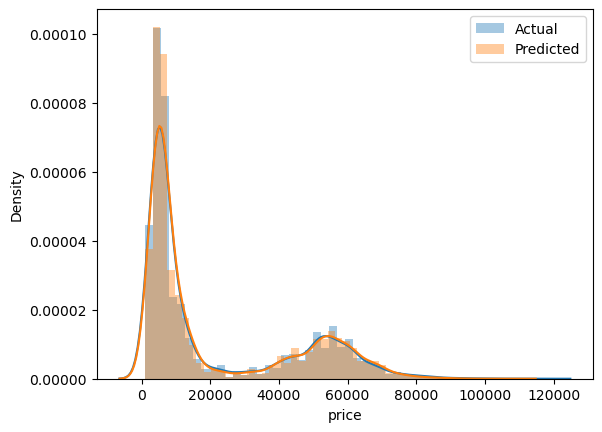

In [84]:
sns.distplot(y_test, label= 'Actual')
sns.distplot(y_pred, label= 'Predicted')
plt.legend()
plt.show()

In [85]:
diff= pd.DataFrame(np.c_[y_test, y_pred], columns= ['Actual Value', 'Predicted Value'])
diff

,Actual Value,Predicted Value
0,4550.0,4648.34
1,31896.0,34082.08
2,8949.0,10588.22
3,65529.0,65434.00
4,74956.0,70588.45
...,...,...
60026,4541.0,5428.98
60027,3501.0,3418.01
60028,4339.0,4196.10
60029,6319.0,6316.36
